In [2]:
import pandas as pd
import os
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

import mne
from mne.preprocessing import compute_proj_ecg
import mne_features as mn

In [7]:
# Creates a variable that holds MEG data
raw = mne.io.read_raw_fif('A1-raw.fif')

Opening raw data file A1-raw.fif...
    Read a total of 8 projection items:
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
        generated with autossp-1.0.1 (1 x 306)  idle
    Range : 1530000 ... 3540999 =    306.000 ...   708.200 secs
Ready.


In [9]:
#prints information about raw (MEG data).
print(raw.info)


<Info | 20 non-empty values
 acq_pars: ACQactiveGround 0 ACQch.BIO001.gain 2000 ACQch.BIO001.highpass ...
 bads: []
 ch_names: EOG001, EOG002, ECG003, EEG001, EEG002, MEG0111, MEG0121, ...
 chs: 2 EOG, 1 ECG, 2 EEG, 103 Magnetometers, 2 Stimulus, 1 SYST
 custom_ref_applied: False
 description: DL
 dig: 444 items (3 Cardinal, 11 HPI, 3 EEG, 427 Extra)
 experimenter: natmeg (natmeg)
 file_id: 4 items (dict)
 gantry_angle: 0.0
 highpass: 0.1 Hz
 hpi_subsystem: 3 items (dict)
 line_freq: 50.0
 lowpass: 1650.0 Hz
 meas_date: 2015-12-10 12:16:33 UTC
 meas_id: 4 items (dict)
 nchan: 111
 proj_id: 1 item (ndarray)
 proj_name: neuro_squid
 projs: generated with autossp-1.0.1: off, generated with autossp-1.0.1: ...
 sfreq: 5000.0 Hz
 subject_info: 3 items (dict)
>


Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.9s finished


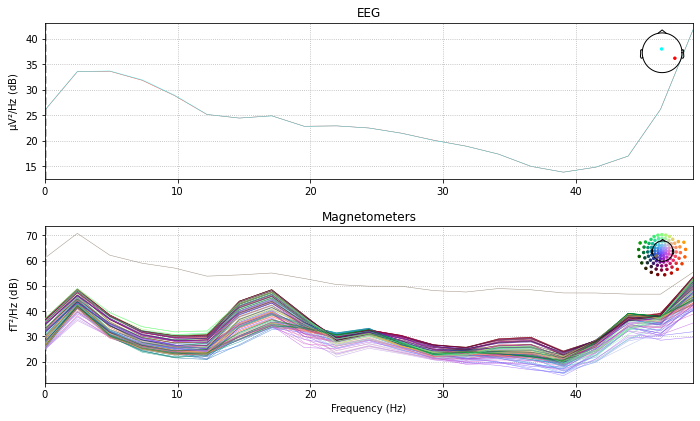

Using matplotlib as 2D backend.


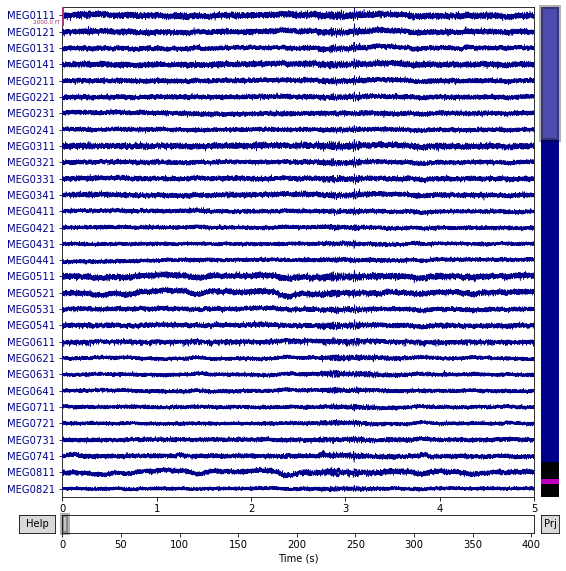

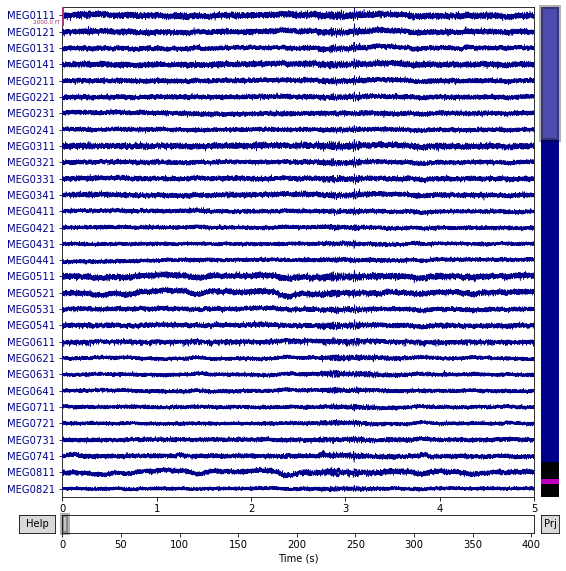

In [10]:
# plots graphs of data.
raw.plot_psd(fmax=50)
raw.plot(duration=5, n_channels=30)

In [12]:
# Read events from file
events_from_file = mne.read_events('A1-eve.fif')

# Creating epochs object
epochs = mne.Epochs(raw, events_from_file, tmin=-0.3, tmax=0.7)

Not setting metadata
1049 matching events found
Setting baseline interval to [-0.3, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 5)
8 projection items activated


Loading data for 1049 events and 5001 original time points ...
Not setting metadata
1049 matching events found
No baseline correction applied
0 projection items activated


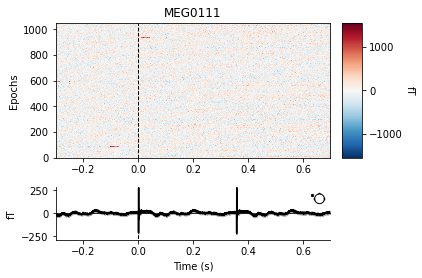

[<Figure size 432x288 with 4 Axes>]

In [21]:
# plot epochs
epochs.plot(n_epochs = 10)

In [19]:
# get data from epochs as a numpy array (n_epochs, n_channels,n_times)
meg_data = epochs.get_data(picks=['mag', 'grad'])

In [20]:
# extracts features from epochs
fe = mn.feature_extraction.extract_features(meg_data,sfreq=5000.0, selected_funcs=['std', 'kurtosis'])
print(fe)
#band pass filter (1-100 Hz)
# low pass filter (ex. average) (cut off at 100)
# high pass filter (cut off at one)

[[1.60314585e-13 1.42989241e-13 1.33474464e-13 ... 4.21559796e+00
  3.65622159e+00 2.45104474e+00]
 [1.57767382e-13 1.41136917e-13 1.27252224e-13 ... 3.50020261e+00
  3.46558409e+00 2.44845108e+00]
 [1.52643178e-13 1.38321766e-13 1.26663986e-13 ... 3.56624057e+00
  3.27627196e+00 2.45884535e+00]
 ...
 [1.53801148e-13 1.42122868e-13 1.31983446e-13 ... 3.85737889e+00
  3.42718330e+00 2.71327929e+00]
 [1.52334243e-13 1.41704172e-13 1.30288379e-13 ... 3.72834983e+00
  3.49826884e+00 2.69251274e+00]
 [1.56270783e-13 1.43486672e-13 1.27969922e-13 ... 3.34625531e+00
  3.28649871e+00 2.70042827e+00]]


In [22]:
raw.crop(0, 60).pick_types(meg='mag', stim=True).load_data()

Reading 0 ... 300000  =      0.000 ...    60.000 secs...


<Raw | A1-raw.fif, 105 x 300001 (60.0 s), ~240.8 MB, data loaded>

Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


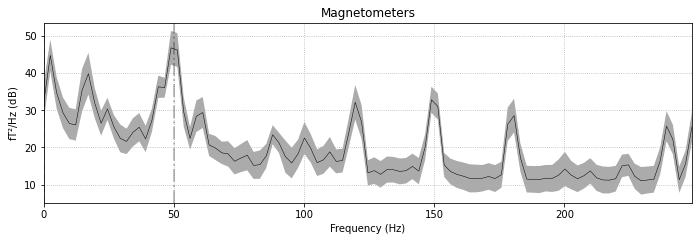

In [30]:
def add_arrows(axes):
    # add some arrows at 60 Hz and its harmonics
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 120, 180, 240):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4):(idx + 5)].max()
            ax.arrow(x=freqs[idx], y=y + 18, dx=0, dy=-12, color='red',
                     width=0.1, head_width=3, length_includes_head=True)


fig = raw.plot_psd(fmax=250, average=True)
add_arrows(fig.axes[:2])

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 33001 samples (6.600 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 103 out of 103 | elapsed:    3.6s finished


Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s finished


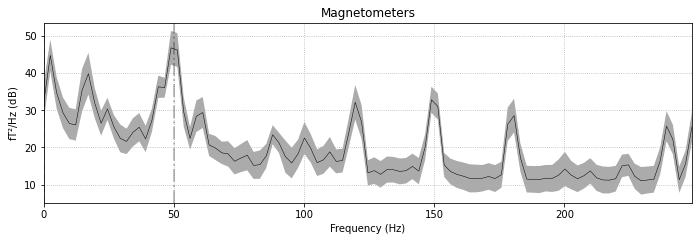

Effective window size : 0.410 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s finished


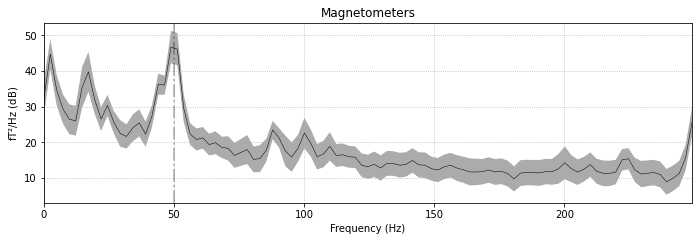

In [32]:
meg_picks = mne.pick_types(raw.info, meg=True)
freqs = (60, 120, 150, 180, 240)
raw_notch = raw.copy().notch_filter(freqs=freqs, picks=meg_picks)
for title, data in zip(['Un', 'Notch '], [raw, raw_notch]):
    fig = data.plot_psd(fmax=250, average=True)
    fig.subplots_adjust(top=0.85)
    fig.suptitle('{}filtered'.format(title), size='xx-large', weight='bold')
    add_arrows(fig.axes[:2])

In [35]:
print(raw.info['bads'])

[]
